<a href="https://colab.research.google.com/github/cwp-kr/ML-class/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-ca7e45c62250>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-16-ca7e45c62250>:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-16-ca7e45c62250>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[1][0] += -alpha * dJdW1_21
<ipython-input-16-ca7e45c62250>:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will erro

MSE and MAPE at epoch  0  : 0.4923692081588331  , 641.2237701880406
MSE and MAPE at epoch  5  : 0.022246601021031175  , 107.66956507883877
MSE and MAPE at epoch  10  : 0.0010939950284458314  , 6.327061349178779
MSE and MAPE at epoch  15  : 0.0009431841058067317  , 6.289273870287084
MSE and MAPE at epoch  20  : 0.000879499477765787  , 6.363546602574931
MSE and MAPE at epoch  25  : 0.0008454180822275695  , 6.422813654178073
MSE and MAPE at epoch  30  : 0.0008243076834218878  , 6.466028368064743
MSE and MAPE at epoch  35  : 0.0008091300290140491  , 6.569256908978918
MSE and MAPE at epoch  40  : 0.0007967970084727224  , 6.720565021532787
MSE and MAPE at epoch  45  : 0.0007859123333003955  , 6.823595534615884
MSE and MAPE at epoch  49  : 0.0007777988486311408  , 6.875034849438898


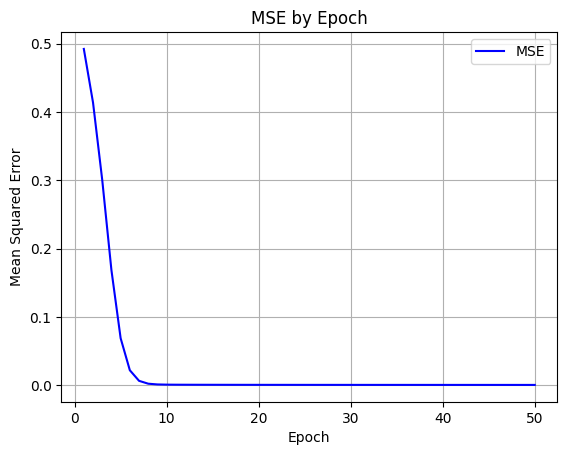

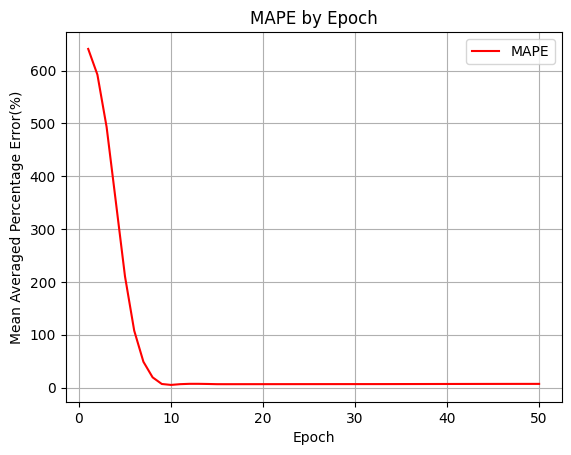

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
samples = 1000

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

Input = np.column_stack((x1,x2))

y = 2*x1+3*x2-1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

alpha = 1e-2
epochs = 50
MSE_list, MAPE_list = [], []
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(samples):
        X = Input[iter]

        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)


        J = 1/2*(y_pred-y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred-y[iter])/y[iter])*100


        dJdY = (y_pred-y[iter])
        dJdW2_11, dJdW2_12, dJdW2_13 = dJdY*Z[0], dJdY*Z[1], dJdY*Z[2]
        dJdb2_1 = dJdY
        dJdZ1, dJdZ2, dJdZ3 = dJdY*W2[0,0], dJdY*W2[0,1], dJdY*W2[0,2]


        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdZ3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdZ3 * sigmoid_derivative(Z_tilde[2])

        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32
        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        b1[2] += -alpha * dJdb1_3
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        b2[0] += -alpha*dJdb2_1
    MSE, MAPE = MSE/samples, MAPE/samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MAPE_list, label='MAPE', linewidth=1.5, color='r')

plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

# **MSE와 MAPE 그래프 둘 다 초기에 에러율이 큰 폭으로 감소하고 이후엔 완만해지는 형태의 그래프로 나타난다.**

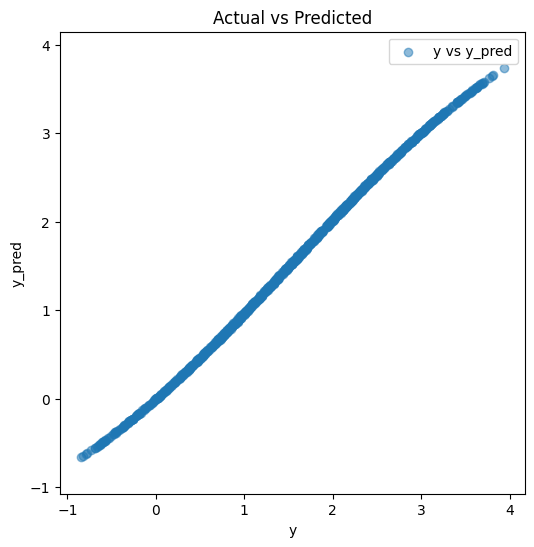

In [15]:
y_pred1 = []
for i in range(samples):
    X = Input[i]
    Z_tilde = W1 @ X.reshape(-1, 1) + b1.reshape(-1, 1)
    Z = sigmoid(Z_tilde)
    y_pred = W2 @ Z + b2.reshape(-1, 1)
    y_pred1.append(y_pred.item())


plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred1, alpha=0.5, label='y vs y_pred')
plt.xlabel("y")
plt.ylabel("y_pred")
plt.title("Actual vs Predicted")
plt.legend()
plt.axis('equal')
plt.show()


# **y값과 y_pred값을 점선에 찍어봤을 때 거의 기울기 1의 1차함수에 가까운 형태로 나타나는 것으로 보아 가중치와 바이어스가 제대로 구해진 것 같습니다**